In [1]:
using Pkg
Pkg.activate("..")
Pkg.instantiate()
using JPEC, Plots
gr()

  Activating project at `c:\Users\thlmi\OneDrive\바탕 화면\서울대\대학원\codes\JPEC\JPEC-github0708\JPEC`
Precompiling project...
   1749.1 ms  ✓ JPEC
  1 dependency successfully precompiled in 4 seconds. 183 already precompiled.


Plots.GRBackend()

In [2]:
# Make sine and cosine spline
xs = range(0.0, stop=2*pi, length=20)
xs = collect(xs)
fs = sin.(xs)
fc = cos.(xs)
# Make a vector of vectors of (100,2) for the spline
fs_matrix = hcat(fs, fc)

# print(xs)
spline = JPEC.SplinesMod.spline_setup(xs, fs_matrix; bctype="not-a-knot")

JPEC.SplinesMod.CubicSpline.RealSplineType(Ptr{Nothing} @0x0000029cd2abe070, [0.0, 0.3306939635357677, 0.6613879270715354, 0.9920818906073031, 1.3227758541430708, 1.6534698176788385, 1.9841637812146062, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.9683275624292125, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586], [0.0 1.0; 0.32469946920468346 0.9458172417006346; … ; -0.32469946920468373 0.9458172417006346; -2.4492935982947064e-16 1.0], 19, 2, 0, 4, Matrix{Float64}(undef, 0, 0), [1.0020411164582979 0.006141639204270929; 0.9451886264310148 -0.3263232606425507; … ; 0.9451886264310138 0.3263232606425512; 1.0020411164582992 -0.006141639204272481])

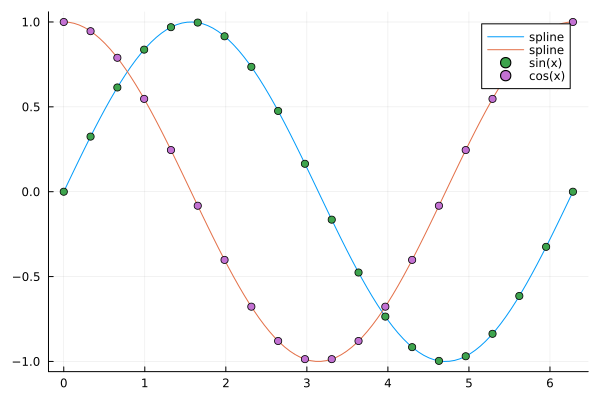

In [3]:
# example: f = GPECsplines.spline_eval(spline, 3.2)
# plot the spline
xs_fine = collect(range(0.0, stop=2*pi, length=100))
fs_fine = JPEC.SplinesMod.spline_eval(spline, xs_fine)
plot(xs_fine, fs_fine, label="spline", legend=:topright)
# plot the input data scatter
scatter!(xs, fs, label="sin(x)", legend=:topright)
scatter!(xs, fc, label="cos(x)", legend=:topright)

In [4]:
# Make e^-ix and e^ix spline
xs = range(0.0, stop=2*pi, length=20)
xs = collect(xs)
fm = exp.(-im .* xs)
fp = exp.(im .* xs)
# Make a vector of vectors of (100,2) for the spline
fs_matrix = hcat(fm, fp)

spline = JPEC.SplinesMod.spline_setup(xs, fs_matrix; bctype="periodic")


JPEC.SplinesMod.CubicSpline.ComplexSplineType(Ptr{Nothing} @0x0000029cebbd2650, [0.0, 0.3306939635357677, 0.6613879270715354, 0.9920818906073031, 1.3227758541430708, 1.6534698176788385, 1.9841637812146062, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.9683275624292125, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586], ComplexF64[1.0 - 0.0im 1.0 + 0.0im; 0.9458172417006346 - 0.32469946920468346im 0.9458172417006346 + 0.32469946920468346im; … ; 0.9458172417006346 + 0.32469946920468373im 0.9458172417006346 - 0.32469946920468373im; 1.0 + 2.4492935982947064e-16im 1.0 - 2.4492935982947064e-16im], 19, 2, 0, 2, Matrix{ComplexF64}(undef, 0, 0), ComplexF64[-1.4685762096878452e-16 - 0.9999326890571674im -1.4685762096878452e-16 + 0.9999326890571674im; -0.32467761337727397 - 0.945753577850348im -0.32467761337727397 + 0.945753577850348im; … ; 0.32467761337727435

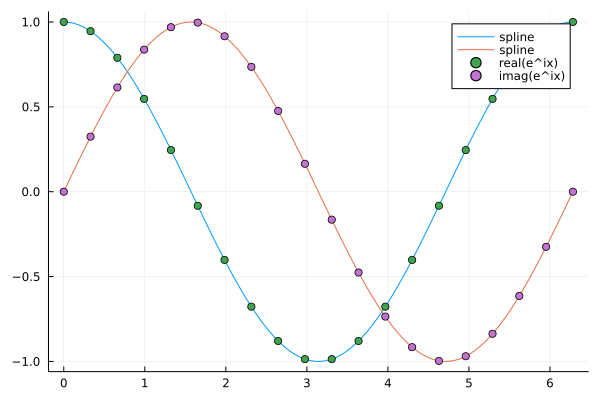

In [5]:
# example: f = GPECsplines.spline_eval(spline, 3.2)
# plot the spline
xs_fine = collect(range(0.0, stop=2*pi, length=100))
fs_fine = JPEC.SplinesMod.spline_eval(spline, xs_fine)

# plot just the real part of e^(+ix)
plot(xs_fine, real(fs_fine[:, 2]), label="spline", legend=:topright)
# and the imaginary part
plot!(xs_fine, imag(fs_fine[:, 2]), label="spline", legend=:topright)
# plot the input data scatter
scatter!(xs, real(fs_matrix[:, 2]), label="real(e^ix)", legend=:topright)
scatter!(xs, imag(fs_matrix[:, 2]), label="imag(e^ix)", legend=:topright)

In [6]:
# make a bicubic spline of a 2d periodic function
xs = range(0.0, stop=2*pi, length=20)
ys = range(0.0, stop=2*pi, length=20)
xs = collect(xs)
ys = collect(ys)
fs1 = sin.(xs') .* cos.(ys) .+ 1.0
fs2 = cos.(xs') .* sin.(ys) .+ 1.0
fs = zeros(20, 20, 2)
# fs is a 20x20x2 array
fs[:, :, 1] = fs1
fs[:, :, 2] = fs2
println("fs size: ", size(fs))

# Make a bicubic spline
bcspline = JPEC.SplinesMod.bicube_setup(xs, ys, fs; bctypex=2, bctypey="periodic") # it gets both number and string.

fs size: (20, 20, 2)


JPEC.SplinesMod.BicubicSpline.BicubicSplineType(Ptr{Nothing} @0x0000029cce5c8c50, [0.0, 0.3306939635357677, 0.6613879270715354, 0.9920818906073031, 1.3227758541430708, 1.6534698176788385, 1.9841637812146062, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.9683275624292125, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586], [0.0, 0.3306939635357677, 0.6613879270715354, 0.9920818906073031, 1.3227758541430708, 1.6534698176788385, 1.9841637812146062, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.9683275624292125, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586], [1.0 1.3246994692046834 … 0.6753005307953163 0.9999999999999998; 1.0 1.3071063563448337 … 0.6928936436551658 0.9999999999999998; … ; 1.0 1.3071063563448337 … 

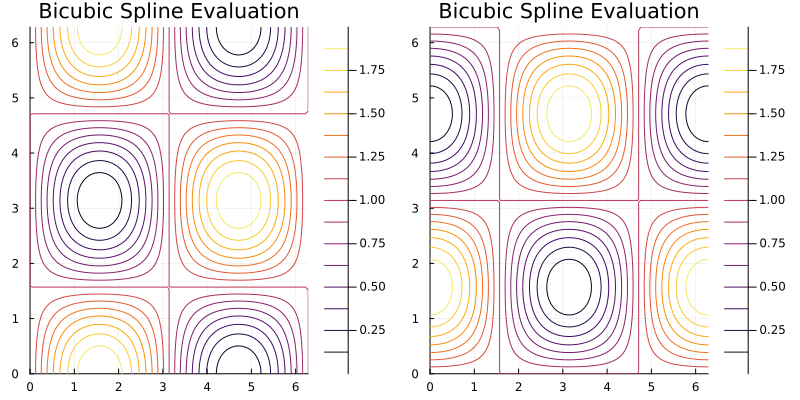

In [7]:
# Evaluate the bicubic spline
xs_fine = collect(range(0.0, stop=2*pi, length=100))
ys_fine = collect(range(0.0, stop=2*pi, length=100))
fs_fine = JPEC.SplinesMod.bicube_eval(bcspline, xs_fine, ys_fine)

# plot the bicubic spline
p1 = contour(xs_fine, ys_fine, fs_fine[:, :, 1], label="sin(x)cos(y)+1", legend=:topright)
p2 = contour(xs_fine, ys_fine, fs_fine[:, :, 2], label="cos(x)sin(y)+1", legend=:topright)
plot(p1, p2, layout=(1, 2), size=(800, 400), title="Bicubic Spline Evaluation")

In [8]:
# make a Fourier spline of a y - periodic, x - polynomial function
xs = range(0.0, stop=2*pi, length=20)
ys = range(0.0, stop=2*pi, length=20)
xs = collect(xs)
ys = collect(ys)
fs1 = (xs.^2)' .* cos.(2 .* ys)
fs2 = xs' .* sin.(ys)
fs = zeros(20, 20, 2)

fs[:, :, 1] = fs1
fs[:, :, 2] = fs2
println("fs size: ", size(fs))

# Make a Fourier spline
mband_val = 4
fspline = JPEC.SplinesMod.fspline_setup(xs, ys, fs, mband_val, bctype=2, fit_method=1,fit_flag=true)


fs size: (20, 20, 2)


JPEC.SplinesMod.FourierSpline.FourierSplineType(Ptr{Nothing} @0x0000029cd29321d0, [0.0, 0.3306939635357677, 0.6613879270715354, 0.9920818906073031, 1.3227758541430708, 1.6534698176788385, 1.9841637812146062, 2.3148577447503738, 2.6455517082861415, 2.9762456718219092, 3.306939635357677, 3.6376335988934447, 3.9683275624292125, 4.29902152596498, 4.6297154895007475, 4.960409453036515, 5.291103416572283, 5.621797380108051, 5.9524913436438185, 6.283185307179586], Float64[], [0.0 0.10935849751899565 … 35.432153196154594 39.47841760435743; 0.0 0.08629922043896447 … 27.960947422224493 31.154018578466175; … ; 0.0 0.08629922043896443 … 27.96094742222448 31.15401857846616; 0.0 0.10935849751899565 … 35.432153196154594 39.47841760435743;;; 0.0 0.0 … 0.0 0.0; 0.0 0.10737615442925671 … 1.932770779726621 2.0401469341558776; … ; -0.0 -0.10737615442925681 … -1.9327707797266225 -2.0401469341558793; -0.0 -8.099666078828588e-17 … -1.457939894189146e-15 -1.5389365549774318e-15], 19, 19, 4, 2, 2, 1, 0)

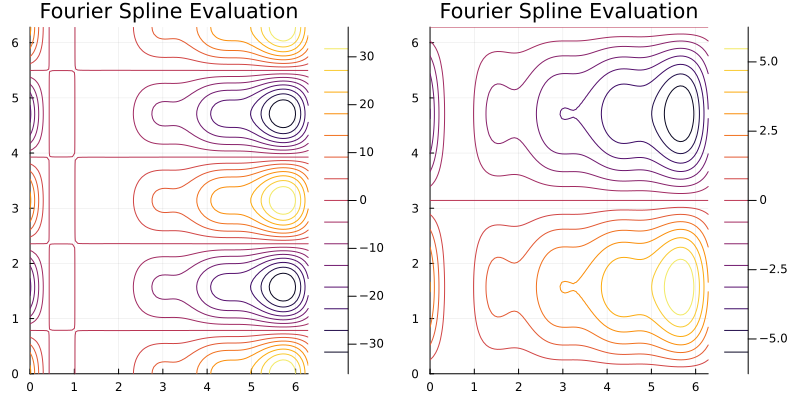

In [9]:
# Evaluate the bicubic spline
xs_fine = collect(range(0.0, stop=2*pi, length=100))
ys_fine = collect(range(0.0, stop=2*pi, length=100))
fs_fine = JPEC.SplinesMod.fspline_eval(fspline, xs_fine, ys_fine, 0)

# plot the Fourier spline
p1 = contour(xs_fine, ys_fine, fs_fine[:, :, 1], label="x^2cos(y)", legend=:topright)
p2 = contour(xs_fine, ys_fine, fs_fine[:, :, 2], label="xcos(y)", legend=:topright)
plot(p1, p2, layout=(1, 2), size=(800, 400), title="Fourier Spline Evaluation")

In [10]:
# structures are readonly

#spline.bctype = Int32(2)
#spline.fs[2,2]=3 # they make error


In [11]:
# Arrays can be modified by appending _ to them if necessary (regular variables cannot)
println(spline.fs[2,2])
spline._fs[2,2]=2
println(spline.fs[2,2])
# but normal variables (bctype, mx, ..) are not possible
#spline._bctype = Int32(2) # this makes error

0.9458172417006346 + 0.32469946920468346im
2.0 + 0.0im
